(sec:random)=
# Osnove naključnih procesov

Dinamične obremenitve pogosto niso deterministične; primeri naključnih obremenitve so: obremenitve zaradi morskih valov, hrapavost ceste in vibracije zaradi pogonskega motorja. Take obremenitve je treba obravnavati kot **naključne procese**. V tem poglavju si bomo pogledali kako to naredimo in kako jih potem uspešno uporabimo pri obravnavi dinamskih sistemov. 

Naključnih podatkov v nasprotju z determinističnimi podatki ni mogoče natančno predvideti, določene značilnosti pa lahko razberemo z analizo njihovih segmentov; če na primer pomerimo hrapavost segmenta površine, lahko z določeno verjetnostjo sklepamo o značilnostih hrapavosti drugih segmentov. Pri opisu naključnih procesov si pogosto pomagamo s predpostavko porazdelitve procesa (npr. normalno porazdeljen proces).

Medtem ko bi lahko naključni proces analizirali v časovni domeni, obstajajo pomanjkljivosti za uporabo takega pristopa. Za ustrezno vrednotenje procesa je treba v časovni domeni opraviti dovolj veliko število vzorčnih meritev (ali opazovanj), ki jih nato analiziramo kot skupino (ansambel, ang. *ensemble*). Kakor bomo videli pozneje, je strukturno dinamiko in naključne procese v frekvenčni domeni bistveno elegantneje analizirati.

Referenčna besedila, ki poglobljeno obravnavajo to temo, ki jih priporočajo bralcu, so {cite:t}`bendat_2011`, {cite:t}`newland_1993` ter {cite:t}`shin2008`. Nekatere vsebine so povzete po {cite:t}`slavic2020VF`.

## Kaj je naključni proces?

Naključni proces je definiran s kombinacijo **funkcije gostote verjetnosti** (ang. *Probability Density Function* - PDF) in **spektralno gostoto moči** (ang. *Power Spectral Density* - PSD).

Slika spodaj prikazuje ansambel $\left\{x_k(t)\right\}$ vzorčnih funkcij (opazovanj) $x_k(t)$, pri čemer je vsako opazovanje $k$ sestavljeno iz naključne spremenljivke v času $t_i$: $x_k(t_i)$. Kot bo obravnavano kasneje, predpostavki o stacionarnosti in ergodičnosti bistveno poenostavijo analizo naključnih podatkov (več pozneje).

![random_ensemble](./images/random_ensemble.svg)

## Normalna porazdelitev (Gaussov proces)

Gaussova porazdelitev je pogosto opažena pri različnih fizikalnih pojavih, njeno razširjenost pa pojasnjuje centralni limitni teorem (glejte {cite:t}`bendat_2011`. Na splošno je Gaussov proces tisti, pri katerem verjetnost kombinacije naključnih spremenljivk ob določenih časih $\left\{x(t_i)\right\}$ sledi večdimenzionalni Gaussovi porazdelitvi. Če pogledamo samo en trenutek v času $t$, verjetnost amplitude $x$ ureja normalna funkcija gostote verjetnosti (PDF) $p(x)$:

$$
p(x) = \frac{1}{\sigma \, \sqrt{2 \, \pi}} \, \mathrm{e}^{-\frac{(x-\mu)^2}{2 \,\sigma^2}}
$$

Tukaj je $\mu$ povprečna vrednost, $\sigma$ je standardni odklon (deviacija) oziroma $\sigma^2$ varianca.
Srednja vrednost $\mu$ in varianca $\sigma^2$ določata obliko PDF in se pogosto imenujeta prvi moment in drugi centralni moment; izračunamo ju s pomočjo funkcije gostote verjetnosti:


$$
\mu = \int_{-\infty}^{+\infty} x \, p(x)\, \textrm{d} x,
$$

$$
\sigma^2 = \int_{-\infty}^{+\infty} (x - \mu)^2 \, p(x)\, \textrm{d} x.
$$

Primer različnih normalnih porazdelitev prikazuje slika spodaj.

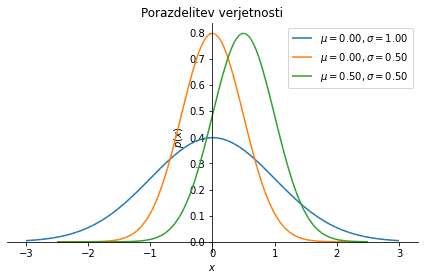

In [20]:
import sympy as sym
σ, μ, x, = sym.symbols('\sigma, \mu, x', real=True)
π = sym.pi

p = 1/(σ*sym.sqrt(2*π)) * sym.exp(-(x-μ)**2/(2*σ**2))

podatki = {σ: 1., μ: 0.}

p1 = sym.plot(p.subs(podatki), (x, -3*σ.subs(podatki), +3*σ.subs(podatki)), line_color='C0', 
              label=f'$\\mu={μ.subs(podatki):3.2f}, \\sigma={σ.subs(podatki):3.2f}$', show=False, 
              title='Porazdelitev verjetnosti', ylabel='$p(x)$', xlabel='$x$')

podatki = {σ: 0.5, μ: 0.}
p2 = sym.plot(p.subs(podatki), (x, -5*σ.subs(podatki), +5*σ.subs(podatki)), line_color='C1', 
              label=f'$\\mu={μ.subs(podatki):3.2f}, \\sigma={σ.subs(podatki):3.2f}$', show=False)
podatki = {σ: 0.5, μ: 0.5}
p3 = sym.plot(p.subs(podatki), (x, -5*σ.subs(podatki), +5*σ.subs(podatki)), line_color='C2', 
              label=f'$\\mu={μ.subs(podatki):3.2f}, \\sigma={σ.subs(podatki):3.2f}$', show=False)
p1.extend(p2)
p1.extend(p3)
p1.legend = True
p1.show()

S spodnjim izračunom lahko preverimo, da sta prvi moment in drugi centralni moment za Gaussovo/normalno porazdelitev dejansko $\mu$  in $\sigma^2$:

In [42]:
import sympy as sym
σ, μ, x, = sym.symbols('\sigma, \mu, x', real=True, positive=True)
π = sym.pi

p = 1/(σ*sym.sqrt(2*π)) * sym.exp(-(x-μ)**2/(2*σ**2))

m1 = sym.integrate(x*p, (x, -sym.oo, +sym.oo))
cm2 = sym.integrate((x-μ)**2 * p, (x, -sym.oo, +sym.oo))

m1

\mu

In [41]:
cm2

\sigma**2

Spodaj je še primer numeričnega generiranja normalne porazdelitve in primerjava s teoretično funkcijo gostote verjetnosti.

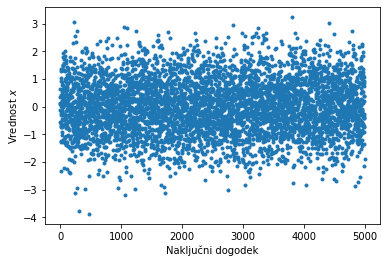

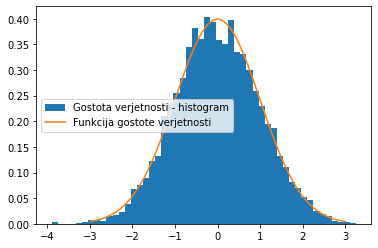

In [80]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
σ, μ, x, = sym.symbols('\sigma, \mu, x', real=True, positive=True)
π = sym.pi

p = 1/(σ*sym.sqrt(2*π)) * sym.exp(-(x-μ)**2/(2*σ**2))
podatki = {σ: 1., μ: 0.}
pdf = sym.lambdify(x, p.subs(podatki))


rng = np.random.default_rng(0)
x = rng.normal(loc=podatki[μ], scale=podatki[σ], size=5000)
plt.plot(x, '.')
plt.xlabel('Naključni dogodek')
plt.ylabel('Vrednost $x$')
plt.show()

plt.hist(x, bins=50, density=True, label='Gostota verjetnosti - histogram')

x = np.linspace(-3*podatki[σ],3*podatki[σ], 100)
plt.plot(x, pdf(x), label='Funkcija gostote verjetnosti')
plt.legend()
plt.show()

## Momenti funkcije gostote verjetnosti

V nadaljevanju si bomo pogledali orodja za popis lastnosti naključnih procesov. Predpostavimo, da imamo dva naključna procesa $\left\{x_k(t)\right\}$ in $\left\{y_k(t)\right\}$, kjer je $k$ indeks ponovitve procesa ob času $t$. Statistično povprečje celotnega ansambla ponovitev procesa (čez indeks $k$) označimo kot ($E[]$ označuje *pričakovano vrednost*/posplošeno povprečje, ang. *expected value*, glejte tudi [povezavo](https://en.wikipedia.org/wiki/Expected_value)):

$$
\begin{split}
\mu_x(t) &= E[x(t)],\\
\mu_y(t) &= E[y(t)].\\
\end{split}
$$

Povprečje se lahko spreminja s časom $t$.

:::{note}

Zgornji izraz posplošimo tako, da definiramo **$n$-ti moment funkcije gostote verjetnosti**:

$$
\mu_{x}^n(t)= E[x^n(t)] = \int_{-\infty}^{+\infty} x^n\, p(x)\, \textrm{d} x
$$

:::

*Kovariančne funkcije* so za dva procesa definirane $\left\{x_k(t)\right\}$ in $\left\{y_k(t) \right\}$ kot:

$$
\begin{split}
C_{xx}(t, t+\tau) &= E \big{[}[x(t) - \mu_x(t)] \, [x(t+\tau) - \mu_x(t+ \tau)]\big{]}, \\
C_{yy}(t, t+\tau) &= E \big{[}[y(t) - \mu_y(t)] \, [y(t+\tau) - \mu_y(t+ \tau)]\big{]}, \\
C_{xy}(t, t+\tau) &= E \big{[}[x(t) - \mu_x(t)] \, [y(t+\tau) - \mu_y(t+ \tau)]\big{]} \\
\end{split}
$$

Poseben primer, vreden pozornosti, je pri $\tau = 0$:

$$
\begin{split}
C_{xx}(t, t) &= E \big{[}[x(t) - \mu_x(t)]^2\big{]}= \sigma_x^2(t), \\
C_{yy}(t, t) &= E \big{[}[y(t) - \mu_y(t)]^2\big{]}= \sigma_y^2(t), \\
C_{xy}(t, t) &= E \big{[}[x(t) - \mu_x(t)] \, [y(t) - \mu_y(t)]\big{]} = C_{xy}(t)\\
\end{split}
$$

Varianci $\sigma_x^2(t)$ in $\sigma_y^2(t)$ sta tako definirani in $C_{xy}(t)$ je kovarianca med $\left \{x_k(t)\right\}$ in $\left\{y_k(t)\right\}$ ob času $t$. 

Če bi analizirali proces z dvodimenzionalno normalno porazdelitvijo, bi bile lastnosti $\sigma_x^2(t)$, $\sigma_y^2(t)$ in $C_{xy}(t)$ dovolj za  popis verjetnosti v določenih časovnih točkah $t$.

:::{note}

Zgornji izraz posplošimo tako, da definiramo **$n$-ti centralni moment funkcije gostote verjetnosti**:

$$
\sigma^n(t)= E[(x(t)-\mu_x)^n] = \int_{-\infty}^{+\infty} (x-\mu_x)^n\, p(x)\, \textrm{d} x
$$

:::

:::{note}

Za naključna procesa $\left\{x_k(t)\right\}$ in $\left\{y_k(t)\right\}$ pravimo, da sta **šibko stacionarna**, ko so srednje vrednosti in kovariančne funkcije časovno neodvisne. Procesi se štejejo za **močno stacionarne**, ko so časovno neodvisni tudi statistični momenti višjega reda in križni momenti. Šibka in močna stacionarnost sovpadata za Gaussov proces (funkcijo porazdelitve verjetnosti je mogoče izpeljati samo iz srednjih vrednosti in kovarianc {cite}`newland_1993`).

:::

:::{note}

**Auto-korelacijska** $R_{xx}(\tau)$ in **križno-korelacijska** funkcija $R_{xy}(\tau)$ se uporabljajo za stacionarne naključne procese in je enaka kovariančnim funkcijam v primeru procesa z ničelno srednjo vrednostjo:

$$
\begin{split}
R_{xx}(\tau) &= E[ x_k(t) \, x_k(t+\tau)], \\
R_{yy}(\tau) &= E[ y_k(t) \, y_k(t+\tau)], \\
R_{xy}(\tau) &= E[ x_k(t) \, y_k(t+\tau)]. \\
\end{split}
$$

:::

## Ergodičnost

Namesto, da srednjo vrednost določamo čez ansambel dogodkov, lahko srednjo vrednost določimo na podlagi časovnega povprečja:

$$
\begin{split}
\mu_x(k) &= \lim_{T \to \infty} \frac{1}{T}\int_{0}^{T} x_k(t)\, \textrm{d}  t, \\
\mu_y(k) &= \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} y_k(t)\, \textrm{d}  t.\\
\end{split}
$$

Preprosto povedano: če bi hkrati vrglo igralno kocko za *Človek ne jezi* se 1000 ljudi, bi dobili zelo podoben rezultat kakor pa, če bi ena oseba vrgla kocko 1000 krat. Pri tem moramo predpostaviti, da zaporedni dogodki v času (ko meče ena oseba) niso med seboj povezani. V zgornji enačbi tako opazujemo $k$-ti proces v času.

Podobno lahko trdimo za kovariančno funkcijo:

$$
\begin{split}
C_{xx}(\tau, k) &= \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} \left[x_k(t)-\mu_x(k)\right] \, \left[x_k(t+\tau) - \mu_x(k)\right] \textrm{d}  t \\
&= R_{xx}(\tau, k) - \mu_x^2(k), \\
C_{yy}(\tau, k) &= \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} \left[y_k(t)-\mu_y(k)\right] \, \left[y_k(t+\tau) - \mu_y(k)\right] \textrm{d}  t \\
&= R_{yy}(\tau, k) - \mu_y^2(k), \\
C_{xy}(\tau, k) &= \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} \left[x_k(t)-\mu_x(k)\right] \, \left[y_k(t+\tau) - \mu_y(k)\right] \textrm{d}  t \\
&= R_{xy}(\tau, k) - \mu_x(k) \, \mu_y(k). \\
\end{split}
$$

:::{note}

Proces rečemo, da je **šibko ergodičen** (ang. *weakly ergodic*), če so časovna povprečja enaka povprečjem ansambla dogodkov, neodvisno od izbranega $k$:

$$
\begin{split}
\mu_x(k) &= \mu_x, \\
\mu_y(k) &= \mu_y, \\
C_{xx}(\tau, k) &= C_{xx}(\tau), \\
C_{yy}(\tau, k) &= C_{yy}(\tau), \\
C_{xy}(\tau, k) &= C_{xy}(\tau). \\
\end{split}
$$

:::

Če pogoji šibke ergodičnosti veljajo za vse statistične lastnosti višjega reda, je proces **močno ergodičen** (ang. *strongly ergodic*). Za Gaussovo porazdelitev pa sta močna in šibka ergodičnost zamenljiva izraza, kot je bilo v primeru stacionarnosti - prvi moment in drugi centralni moment sta dovolj za enolični opis Gaussove porazdelitve. V takih primerih so statistične lastnosti vsake ločene vzorčne funkcije reprezentativne za celoten ansambel. Pri nadaljnji analizi ergodičnih procesov lahko torej indeks $k$ izpustimo in vzorčno funkcijo, ki v celoti opisuje lastnosti naključnega procesa, označimo z $x(t)$.

Ergodičnost je pomembna iz različnih razlogov: poenostavlja nadaljnjo teoretično obravnavo naključnih procesov; še pomembneje pa je, da omogoča analizo dejansko izmerjenih naključnih podatkov. Namesto analize velikega ansambla časovnih zgodovin pri istem času $t$, običajno zadostuje, da si ogledamo eno samo časovno zgodovino in na podlagi predpostavke ergodičnosti izluščimo iz nje potrebne statistične lastnosti.

V strukturni dinamiki ponavadi predpostavimo, da ima proces ničelno povprečje in je zato varianco $\sigma_x^2$ za takšen primer mogoče izračunati na različne načine:

$$
\begin{split}
\sigma_x^2 &= E \left[x^2(t)\right] = \int_{-\infty}^{+\infty} x^2 \, p(x)\, \textrm{d} x \\
&= \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} x^2(t)\,\textrm{d} t \\
&= \int_{-\infty}^{+\infty} S_{xx}(f)\,\textrm{d} f. \\
\end{split}
$$

V zgornjih izrazih je predpostavljeno, da $x(t)$ predstavlja periodične podatke s periodo $T$. S $S_{xx}(f)$ smo označili spektralno gostoto moči (ang. *power spectral density*) in smo se v tej vrstici naslonili na Parsevalov teorem (glejte: {ref}`sec:parseval`). V naslednjem poglavju si bomo spektralno gostoto moči pogledali bolj podrobno. Opomba: če obravnavamo normalno porazdeljeni proces z ničelno srednjo vrednostjo, je varianca edini manjkajoči parameter, ki tako porazdelitev enolično določi.

## Spektralna gostota moči (PSD)

Spektralna gostota moči opisuje frekvenčno gostoto moči naključnega procesa in dopolnjuje funkcijo gostote verjetnosti ($p(x)$) pri definiciji določenega naključnega procesa; ista gostota verjetnosti ima lahko v frekvenčni domeni zelo različne gostote spektralne moči (PSD). PSD ponavadi pridobimo s Fourierjevo transformacijo, običajno z uporabo algoritma FFT.

Definicija PSD temelji na avto-korelacijski funkciji $R_{xx}(\tau)$, ki implicitno vsebuje frekvenčno vsebino $x(t)$, hkrati pa izpolnjuje Dirichletov pogoj (vsaj v primeru procesov z ničelno srednjo vrednostjo):

$$
\int_{-\infty}^{+\infty} \left|x(t)\right| \textrm{d} t < \infty.
$$

Ker sta avto-korelacijska funkcija in PSD par Fourierjeve transformacije, lahko za naključna procesa $x(t)$ in $y(t)$ zapišemo naslednje (Wiener-Khinchine) odnose:

$$
\begin{split}
S_{xx}(f) &= \mathcal{F}\{R_{xx}(\tau)\}, \\
S_{yy}(f) &= \mathcal{F}\{R_{yy}(\tau)\}, \\
S_{xy}(f) &= \mathcal{F}\{R_{xy}(\tau)\}.
\end{split}
$$

PSD $S_{xx}(f)$ in $S_{yy}(f)$ (imenovana tudi auto-spektralna gostota) sta sodi funkciji s pozitivnimi realnimi vrednostmi. Križna-spektralna gostota $S_{xy}(f)$ ima v splošnem kompleksne vrednosti.

V primeru realnih meritev je časovna zgodovina končne dolžine in Diricletov pogoj je izpolnjen; iz Fourierove transformacije $k$-te časovne zgodovine:

$$
\begin{split}
X_k(f, T) = \int_0^T x_k(t) \,e^{- \textrm{i} \, 2 \, \pi \, f \, t} \,\textrm{d} t, \\
Y_k(f, T) = \int_0^T y_k(t) \,e^{- \textrm{i} \, 2 \, \pi \, f \, t} \,\textrm{d} t \\
\end{split}
$$

lahko z množenje Fourierovih transformirank  določimo križno-spektralno gostoto:

$$
S_{xy}(f, T, k) = \frac{1}{T}\, X_k^*(f, T) \, Y_k(f, T)
$$

:::{note}

**Avto (PSD)** in **križna (CSD)** spektralna gostota je torej za primer ergodičnega procesa definirana kot (brez indeksa $k$):

$$
\begin{split}\label{eq:Sxx_Syy_ergodic}
S_{xx}(f) &= \frac{1}{T}\, X^*(f) \, X(f)\qquad\text{PSD},\\
S_{xy}(f) &= \frac{1}{T}\, X^*(f) \, Y(f)\qquad\text{CSD},
\end{split}
$$

:::

Avto-spektralna gostota $S_{xx}$ pokriva negativne in pozitivne frekvence in se zato imenuje tudi *dvostranska* funkcija spektralne gostote. Pogosto se uporablja enostranska funkcija spektralne gostote $G_{xx}$, ki je definirana kot:

$$
G_{xx} = 
\begin{cases}
2\,S_{xx}(f), & f>0\\
S_{xx}(f),& f=0\\
0,&f<0.
\end{cases}
$$

Podobno velja za $G_{xy}$, za dvostranski križno-spektralno gostoto velja $S_{xy}=S_{yx}^*$.

### Zgled 1

Poglejmo si najprej izračun avto-spektralne gostote s pomočjo Fourierove transformacije. Na koncu zgleda preverimo Parsevalov teorema v diskretni obliki:

$$
\sum_i x_i^2 = \frac{1}{N}\sum_i X_i^2.
$$

Pri zgledu bodite previdni kako se obravnava $S_{xx}$ in $G_{xx}$.

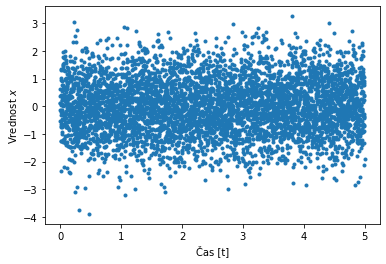

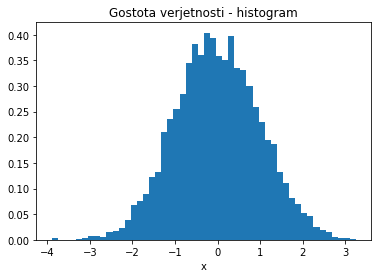

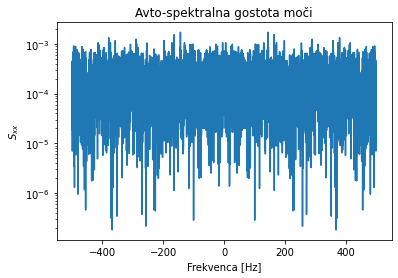

Integral času:  0.9904720416233659 , integral PSD (Sxx):  0.9906062124167657 , integral PSD (Gxx):  0.990830770222994


In [96]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)
N = 5_000
dt = 1./1000
x = rng.normal(size=N)
time = np.arange(N)*dt
T = dt*N
plt.plot(time, x, '.')
plt.xlabel('Čas [t]')
plt.ylabel('Vrednost $x$')
plt.show()

plt.title('Gostota verjetnosti - histogram')
plt.xlabel('x')
plt.hist(x, bins=50, density=True)
plt.show()

X = np.fft.fft(x)/N
freq = np.fft.fftfreq(N, d=dt)
Sxx = X.conj()*X

X_r = np.fft.rfft(x)/N
freq_r = np.fft.rfftfreq(N, d=dt)
Gxx = 2*X_r.conj()*X_r


plt.title('Avto-spektralna gostota moči')
plt.semilogy(freq, np.abs(Sxx))
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('$S_{xx}$')
plt.show()

print('Integral času: ', np.trapz(x*x, dx=dt)/T, 
      ', integral PSD (Sxx): ', np.abs(np.trapz(Sxx)), 
      ', integral PSD (Gxx): ', np.abs(np.trapz(Gxx)))

Pogledamo lahko tudi izračun variance z vgrajeno `numpy.var()` metodo:

In [93]:
np.var(x)

0.9997800291343832

### Zgled 2

Poglejmo si sedaj zgled in najprej izračunajmo varianco s pomočjo definicije normalne porazdelitve z ničelno srednjo vrednostjo $\mu=0$ in standardno deviacijo $\sigma=3$:

$$
\sigma_x^2 = E \left[x^2(t)\right] = \int_{-\infty}^{+\infty} x^2 \, p(x)\, \textrm{d} x
$$


In [98]:
import sympy as sym
σ, μ, x, = sym.symbols('\sigma, \mu, x', real=True, positive=True)
π = sym.pi

p = 1/(σ*sym.sqrt(2*π)) * sym.exp(-(x-μ)**2/(2*σ**2))

podatki = {σ: 3., μ: 0.}

sym.integrate(x**2*p, (x, -sym.oo, +sym.oo)).subs(podatki)

9.00000000000000

Pridobili smo pričakovano vrednost $\sigma^2=9$. Nadaljujemo z integriranjem časovne vrste v času:

$$
\sigma_x^2 = \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} x^2(t)\,\textrm{d} t
$$


In [99]:
import numpy as np

σ = 3
rng = np.random.default_rng(0)
N = 1_000_000
T = 10
time,  dt = np.linspace(0, T, N, retstep=True)
x = rng.normal(scale=σ, size=N)

np.trapz(x**2, dx=dt)/T

9.01211481059612

Ker gre za numerične podatke smo pridobii vrednost, ki je bolj ali manj blizu pričakovani vrednosti $\sigma^2=9$ (poskusite spremeniti `N`). Nadaljujemo z izračunom variance v frekvenčni domeni:

$$
\sigma_x^2 = \int_{-\infty}^{+\infty} S_{xx}(f)\,\textrm{d} f
$$


Ali z uporabo enostranskega amplitudnega spektra:

In [104]:
X = np.fft.fft(x)/N
Sxx = np.real(X.conj()*X)
np.trapz(Sxx)

9.012100217005628

In [105]:
X_r = np.fft.rfft(x)/N
Gxx = X_r.conj()*X_r
Gxx[1:] = 2*Gxx[1:]

In [106]:
np.real(np.trapz(Gxx))

9.012101617720317

## Spektralni momenti

Zaradi definicije PSD sledi, da je površina pod krivuljo enaka pričakovani kvadratni vrednosti $E[x^2]$ procesa (glejte: {ref}`sec:parseval`):

$$
m_0 = E \left[x^2(t)\right] = \int_{-\infty}^{+\infty} S_{xx}(\omega)\, \textrm{d} \omega,
$$

kjer je $m_0$ ničelni spektralni moment enak varianci $\sigma_x^2$ procesa ničelne srednje vrednosti. Višji sodi momenti ustrezajo varianci časovnih odvodov prvotnega naključnega procesa:

$$
m_2 = E \left[\dot{x}^2(t)\right] = \int_{-\infty}^{+\infty} \omega^2 \, S_{xx}(\omega) \,\textrm{d} \omega.
$$

Splošni izraz za $i$-ti spektralni moment $m_i$ lahko zapišemo v obliki:

$$
m_i = \int_{-\infty}^{+\infty} \omega^i \, S_{xx}(\omega) \textrm{d} \omega=\int_{0}^{+\infty} \omega ^i \, G_{xx}(\omega) \,\textrm{d} \omega
$$
kjer je $G_{xx}$ enostranski PSD. 

Treba je poudariti, da če je PSD podan v Hz ($G_{xx}(f)$) je treba pozabiti na pravilno uporabo ročice $(2\pi\,f)^i$:

$$
m_i = \int_{0}^{+\infty} (2\pi\,f)^i \, G_{xx}(f) \,\textrm{d} f
$$

### Zgled

Poglejmo si ponovno zgled; najprej definirajmo harmonski odziv z amplitudo $A=1$. Varianca pomika je pričakovana: $(A/\sqrt{2})^2=0.5\,A$, varianca hitrosti:  hitrosti pa $((2\pi\,f_0\,A)/\sqrt{2})^2=2\pi^2\,f_0^2\,A$ in varianca pospeška $(((2\pi\,f_0)^2\,A)/\sqrt{2})^2=2^3(\pi\,f_0)^4\,A$.

0.5000000000000002

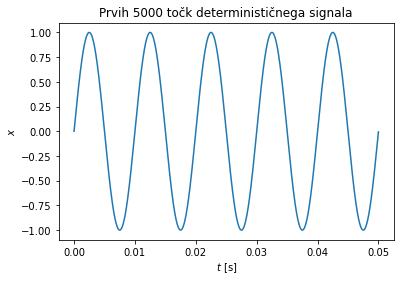

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1_000_000
T = 10
f_0 = 100
time,  dt = np.linspace(0, T, N, retstep=True)
x = np.sin(2*np.pi*f_0*time)
X = np.fft.rfft(x)/N
freq = np.fft.rfftfreq(N, dt)

plt.title('Prvih 5000 točk determinističnega signala')
plt.plot(time[:5000], x[:5000])
plt.xlabel('$t$ [s]')
plt.ylabel('$x$')

np.trapz(x**2, dx=dt)/T

Definirajmo funkcijo spektralnih momentov:

In [2]:
def spektralni_moment(X_r, freq, i=0):
    Gxx = X_r.conj()*X_r
    Gxx[1:] = 2*Gxx[1:]
    return np.real(np.trapz((2*np.pi*freq)**i * Gxx))

Spektralni moment $m_0$ (pomik): preverimo ali res dobimo pričakovano vrednost ($0.5\,A=0.5$) tudi v frekvenčni domeni:

In [3]:
spektralni_moment(X_r=X, freq=freq, i=0)

0.49999950000000004

Spektralni moment $m_2$ (hitrost): za hitrost pričakujemo vrednost $2\pi^2\,f_0^2\,A=197392.08$:

In [4]:
spektralni_moment(X_r=X, freq=freq, i=2)

197392.0431326003

Ali v času:

In [5]:
v = np.gradient(x)/dt
np.trapz(v**2, dx=dt)/T

197389.49045450424

Spektralni moment $m_4$ (pospešek): za pospešek pričakujemo $2^3(\pi\,f_0)^4\,A=77927272827.2$:

In [6]:
spektralni_moment(X_r=X, freq=freq, i=4)

100537780441.40175

Ali v času:

In [7]:
a = np.gradient(v)/dt
np.trapz(a**2, dx=dt)/T

77925221885.31581

Opazimo že relativno veliko odstopanje, razlog je v numerični napaki. Amplitudni spekter $X$ ima zunaj $f_0$ teoretično vrednosti 0, dejansko pa vrednost blizu nič, ker izraz za izračun četrtega spektralnega momenta visoke frekvence zelo poudari ($(2\pi\,f)^4$), se poudari tudi numerična napaka. Boljši rezultat pridobimo, če se npr. frekvenčno omejimo:

In [13]:
sel = np.logical_and(freq>=(f_0-1),freq<=(f_0+1))
spektralni_moment(X_r=X[sel], freq=freq[sel], i=4)

77926866536.70676